Olá Gerson

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Descrição do Projeto

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. 

**Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.**

Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.

## Importar as bibliotecas necessarias

In [1]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from IPython.core.display import HTML
import calendar
import numpy as np
from scipy import stats as st
import warnings

print('Bibliotecas importadas!')

Bibliotecas importadas!



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [2]:
warnings.filterwarnings('ignore') # Ignorar aviso de alguns metodos prestes a depreciar :( . 
cor = "#2ab0ff"
cor2 = "#1071b2"

## Carregar o dataframe

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

print('Dataframe carregado!')

Dataframe carregado!



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Verificacoes iniciais

- Tamanho do dataframe
- Total de duplicados
- Amostra
- Informacoes
- Valores ausentes
- Estatisticas das colunas numericas.

In [4]:
display( HTML( f'<h2 style="color:#2ab0ff">Dataframe</h2>') )

display( HTML( f'<h3>Tamanho do dataframe: {len(df)} registos </h3>') )
display( HTML( f'<h3>Total de duplicados: { ( df.duplicated().sum() ) }  </h3>') )

display( HTML( f'<h3>Amostra</h3>') )
display(df.sample(5))

display( HTML( f'<h3>Informacoes Gerais</h3>') )
print('\n', df.info())

display( HTML( f'<h3>Total de valores ausentes:</h3>') )
display( df.isna().sum().reset_index().sort_values(0) )
#print(df.isna().sum())

display( HTML( f'<h3>Estatisticas das colunas numericas:</h3>') )
display(df.describe())

display(HTML ('<hr>')) # Criar um alinha horizontal 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7159,Darksiders II,PS4,2015.0,Action,0.09,0.10,0.00,0.04,NaN,NaN,NaN
5196,Kirby's Dream Land 3,SNES,1997.0,Platform,0.00,0.00,0.36,0.00,NaN,NaN,NaN
10142,Fabulous Finds,DS,2009.0,Puzzle,0.10,0.00,0.00,0.01,NaN,tbd,E
13382,Black & Bruised,GC,2003.0,Fighting,0.04,0.01,0.00,0.00,NaN,NaN,NaN
13869,Stuntman,GBA,2003.0,Racing,0.03,0.01,0.00,0.00,77.0,tbd,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

 None


,index,0
1,Platform,0
4,NA_sales,0
5,EU_sales,0
6,JP_sales,0
7,Other_sales,0
0,Name,2
3,Genre,2
2,Year_of_Release,269
9,User_Score,6701
10,Rating,6766


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você utilizou recurso mais avançado. Parabéns
</div>

## Preparacao dos dados

### Substituir os nomes das colunas (transformar tudo em minúsculos).

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Tratar valores ausentes

#### Coluna `name`

Começaremos pelas colunas com menor quantidade de valores ausentes

Sabemos que são apenas 2 registos para esta coluna, iremos olhar os mesmos para então decidir.

In [7]:
display ( df.loc[ df.name.isna() ] )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Podemos remover estes registos uma vez que representa uma porção muito pequna do nosso conjunto de dados e também tem varias outras colunas com valores ausentes


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [8]:
df = df.dropna(subset=['name'])


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [9]:
display ( df.loc[ df.name.isna() ] )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Sem mais valores ausentes!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Coluna `genre`

In [10]:
display ( df.loc[ df.genre.isna() ] )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Os registos com valores ausentes para esta coluna foram removidos no tratamento da coluna `name`


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Coluna `year_of_release`

Amostra dos registos

In [11]:
display ( df.loc[ df.year_of_release.isna() ].sample(5) )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12209,Build-A-Bear Workshop: Friendship Valley,Wii,NaN,Misc,0.06,0.00,0.0,0.00,NaN,tbd,E
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T
13195,Tour de France 2011,X360,NaN,Racing,0.00,0.04,0.0,0.01,46.0,7.6,NaN
10050,Star Trek: Conquest,PS2,NaN,Strategy,0.06,0.04,0.0,0.01,54.0,9.1,E
15119,Legacy of Ys: Books I & II,DS,NaN,Role-Playing,0.02,0.00,0.0,0.00,NaN,NaN,NaN


In [12]:
print( f'Os valores ausentes para esta coluna representam {round (df.year_of_release.isna().sum() / len(df), 2 ) * 100} % do conjunto de dados') 

Os valores ausentes para esta coluna representam 2.0 % do conjunto de dados


Para esta coluna iremos substituir pela media ou mediana e de modos a ter mais combinacoes para o preenchimento dos ausentes podemos combinar com a coluna `platform` pois deve ter alguma correlação com o ano de lançamento, esta abordagem apenas para tentar evitar por exemplo um jogo para `ps4` lançado antes de 2013 (ano de lançamento do ps4)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Apenas para matar a curiosidade se temos algum jogo para Ps4 lançado antes de 2013 :)

In [13]:
df.loc[ df.platform == 'PS4' ].year_of_release.value_counts()

2016.0    164
2015.0    137
2014.0     75
2013.0     16
Name: year_of_release, dtype: int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Abaixo criamos um dataframe temporario para guardar a media e mediana por plataforma

In [14]:
df_media_genero = df.groupby( 'platform' ).year_of_release.agg( [ np.mean , np.median] )

df_media_genero

,mean,median
platform,,
2600,1982.137931,1982.0
3DO,1994.666667,1995.0
3DS,2013.126953,2013.0
DC,1999.942308,2000.0
DS,2008.185290,2008.0
GB,1995.958763,1997.0
GBA,2003.210851,2003.0
GC,2003.400369,2003.0
GEN,1993.037037,1993.0


Felizmente os valores (inteiros) acima não diferem, então podemos optar pela media

Criaremos uma funcao para retornar a media por genero que será aplicado ao conjunto de dados.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [15]:
def get_yearmean_by_platform ( plataforma ):
    
    return int ( df_media_genero.loc[ plataforma ]['mean'] )


Teste da funcao

In [16]:
print( df.iloc[0].platform )
print( get_yearmean_by_platform ( df.iloc[0].platform ) )

Wii
2008


Aplicar a funcao para os registos com ausentes

In [17]:
df.loc[ df.year_of_release.isna() , 'year_of_release' ] = df.platform.apply(get_yearmean_by_platform)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Podemos confirmar olhando um dos registos apresentados na amostra mais acima:

In [18]:
df.loc[5655]

name               All-Star Baseball 2005
platform                              PS2
year_of_release                    2004.0
genre                              Sports
na_sales                             0.16
eu_sales                             0.12
jp_sales                              0.0
other_sales                          0.04
critic_score                         72.0
user_score                            8.6
rating                                  E
Name: 5655, dtype: object

In [19]:
df.year_of_release.isna().sum()

0

Sem mais valores ausentes!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Coluna `user_score`

In [20]:
df.user_score.isna().sum()

6699


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [21]:
df.shape

(16713, 11)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [22]:
print( f'Os valores ausentes para esta coluna representam {round (df.user_score.isna().sum() / len(df), 2 ) * 100} % do conjunto de dados') 

Os valores ausentes para esta coluna representam 40.0 % do conjunto de dados



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [23]:
display ( df.loc [ df.user_score.notna() ].head(5) )

display ( df.loc [ df.user_score.notna() ].tail(5) )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.0,48.0,tbd,E
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.0,0.0,60.0,7.2,E10+
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.0,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.0,0.0,NaN,tbd,T



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você pode usar sample()
</div>

In [24]:
display (df.loc [ df.user_score.isna() ].head(5) )

df.loc [ df.user_score.isna() ].tail(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Estamos diante de muitos valores ausentes, 40% representa uma amostra muito significativa, para uma coluna de avaliacao do utilizador que é essencial para a nossa analise sobre o sucesso dos jogos, a remoção destes registos certamente criará um bom impacto nos resultados, mas a verdade é que sem as notas de avaliação não temos como medir, então, iremos remover estes jogos e informar que:  
pelas condicoes que os dados nos foram apresentados foi possivel analisar apenas 60% pois os jogos restantes não tinha avaliação do utilizador.



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Uma possível solução é analisar o comportamento dos usários com NA
</div>

In [25]:
df = df.dropna(subset=['user_score'])

In [26]:
df.user_score.isna().sum()

0

Sem mais valores ausentes para esta coluna!


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Coluna `rating`

In [27]:
df.rating.isna().sum()

136

Inicialmente haviamos reparado que a coluna `rating` possuia 6766 valores ausentes.

Esta diminuição certamente foi resultado da remoção de registos feita na etapa anterior. 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [28]:
display ( df.loc [ df.rating.isna() ].head(5) )

display ( df.loc [ df.rating.isna() ].tail(5) )


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
693,Tomb Raider II,PC,1997.0,Action,0.91,1.25,0.00,0.13,NaN,8.3,NaN
822,R4: Ridge Racer Type 4,PS,1998.0,Racing,0.68,0.46,0.79,0.13,88.0,9.2,NaN
1763,Football Manager 2013,PC,2012.0,Sports,0.00,0.95,0.00,0.21,86.0,6.7,NaN
2054,Monster Rancher,PS,1997.0,Simulation,0.12,0.08,0.74,0.07,86.0,8.3,NaN
2843,Jampack Winter 2001,PS2,2001.0,Misc,0.35,0.28,0.00,0.09,NaN,tbd,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.0,69.0,7.5,NaN
16512,Colin McRae Rally 04,PC,2004.0,Racing,0.00,0.01,0.00,0.0,87.0,7.2,NaN
16655,Summer Athletics,PC,2008.0,Sports,0.00,0.01,0.00,0.0,NaN,tbd,NaN
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.0,74.0,6.7,NaN
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Ver os valores que a coluna tem

In [29]:
df.rating.value_counts()

E       3950
T       2941
M       1560
E10+    1413
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Ver alguns registos validos

In [30]:
display ( df.loc [ df.rating.notna() ].head(5) )

display ( df.loc [ df.rating.notna() ].tail(5) )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.0,48.0,tbd,E
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.0,0.0,60.0,7.2,E10+
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.0,NaN,tbd,E
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.0,0.0,NaN,tbd,T



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Diante das classificacoes actuais que temos nos jogos podemos aproveitar a classificação `RP` que significa Rating Pending (Pendente de avaliação) e atribuir para os registos com valores ausentes nesta coluna.

In [31]:
df.loc [ df.rating.isna(), 'rating' ] = df.rating.fillna('RP')
 
df.rating.isna().sum()

0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [32]:
df.rating.value_counts()

E       3950
T       2941
M       1560
E10+    1413
RP       138
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

Sem mais valores ausentes.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Coluna `critic_score`

In [33]:
df.critic_score.isna().sum()

1915

Esta coluna também sofreu uma reducao de ausentes pelo tratamento dado na coluna user_score


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [34]:
display (df.loc [df.critic_score.isna()].head())
display (df.loc [df.critic_score.notna()].head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


Iremos remover também estes registos pois sem a pontuação critica não podemos responder sobre o sucesso do jogo.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [35]:
df = df.dropna(subset=['critic_score'])

df.isna().any()

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score       False
user_score         False
rating             False
dtype: bool


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

**Sem mais valores ausentes no conjunto de dados.**

In [36]:
print( df.shape[0] )

8099



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Converta os dados para os tipos necessários.


In [37]:
display(df.head(2))
df.dtypes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

- Iremos converter a coluna `year_of_release` para `inteiro`
- As colunas `user_score` para `float`


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [38]:
df['year_of_release'] = df.year_of_release.astype(int)

df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [39]:
#df['user_score'] = pd.to_numeric ( df.user_score , errors='raise')

Pelo resultado da instrucao acima comentada temos alguns registos com o valor tbd > `to be determined`

Iremos usar o argumento errors com o valor `coerce` para transformar em `NaN` e depois removeremos os ausentes novamente.

In [40]:
df.loc [ df.user_score == 'tbd' ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16577,Space Raiders,GC,2003,Shooter,0.01,0.00,0.00,0.00,40.0,tbd,T
16669,Super Robot Taisen: Original Generation,GBA,2002,Role-Playing,0.01,0.00,0.00,0.00,72.0,tbd,T
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [41]:
df['user_score'] = pd.to_numeric ( df.user_score , errors='coerce')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [42]:
df = df.dropna(subset=['user_score'])

df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Processamento e Analise Exploratoria

### Calcular o total de vendas

Iremos calcular o total de vendas de cada jogo somando as vendas em cada região (America, Europa e Japão)

In [43]:
df['total_vendas'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Lançamentos por ano

A seguir iremos contar a quantidade de jogos lançados em cada ano.

In [44]:
df_temp = df.groupby('year_of_release').name.count().reset_index().rename(columns={'year_of_release':'year','name':'total'})

df_temp

,year,total
0,1985,1
1,1988,1
2,1992,1
3,1994,1
4,1996,8
5,1997,14
6,1998,29
7,1999,30
8,2000,102
9,2001,256



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Visualizacao

In [45]:
def lineplotwithDots(df:pd.DataFrame = None, figsize:tuple = (15,8), xcol:str=None, ycol:str=None, title:str=None, xlabel:str=None, ylabel:str=None ):
    
    plt.figure(figsize=figsize)
    
    sns.lineplot(data=df_temp, x=xcol, y=ycol, legend=False, color=cor)
    sns.scatterplot(data=df_temp, x=xcol, y=ycol, alpha=0.4, color=cor2)

    display( HTML( f'<h2 style="color:{cor}"> {title} </h2><br>') )

    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.xticks(fontsize=18, rotation=0)
    plt.yticks(fontsize=18, rotation=0)
    plt.grid(axis = 'x')
    sns.despine(left=False, offset=20, trim=True)
    
    plt.show()    

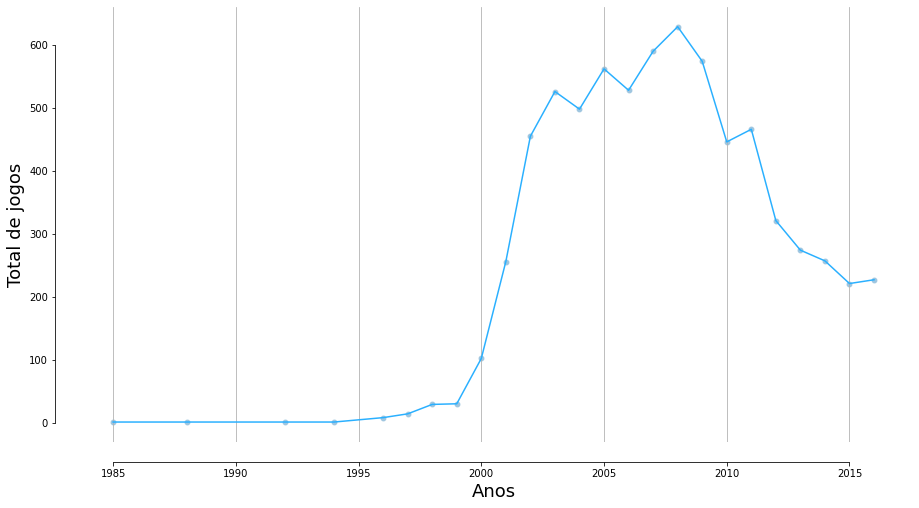

In [46]:
lineplotwithDots(df_temp, (15,8), 'year','total','Lancamento de jogos ao longo dos anos', 'Anos','Total de jogos')


Podemos observar que a partir do ano 2000 nota-se um crescimento acentuado no lançamento de jogos.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente gráfico
</div>

### Variação das vendas por plataforma 


Para responder de forma rápida iremos extrair e analisar as 5 plataformas mais lucrativas.

In [47]:
topplatform = df.groupby('platform').total_vendas.sum().nlargest(5)
topplatform

platform
PS2     962.42
X360    863.39
PS3     792.95
Wii     672.84
DS      383.87
Name: total_vendas, dtype: float64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [48]:
#Lista das plataformas
topplatform.index.tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS']


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [49]:
#Total de jogos registados para as plataformas
df_topplat = df.loc[ df.platform.isin( topplatform.index.tolist() )]
df_topplat.shape[0]

3793


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Temos então o quadro abaixo do rendimento anual das 5 plataformas mais lucrativas.  

In [50]:
#df_temp = df_topplat.pivot_table(index='year_of_release', values='name', aggfunc='count', columns='platform', fill_value=0).reset_index()
#df_temp

df_temp = df_topplat.pivot_table(index=['platform','year_of_release'], values='total_vendas', aggfunc='sum', fill_value=0).reset_index()
df_temp

,platform,year_of_release,total_vendas
0,DS,2004,3.38
1,DS,2005,96.03
2,DS,2006,72.56
3,DS,2007,77.47
4,DS,2008,64.34
5,DS,2009,39.42
6,DS,2010,25.29
7,DS,2011,4.36
8,DS,2012,1.02
9,PS2,2000,29.50



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Visualizacao

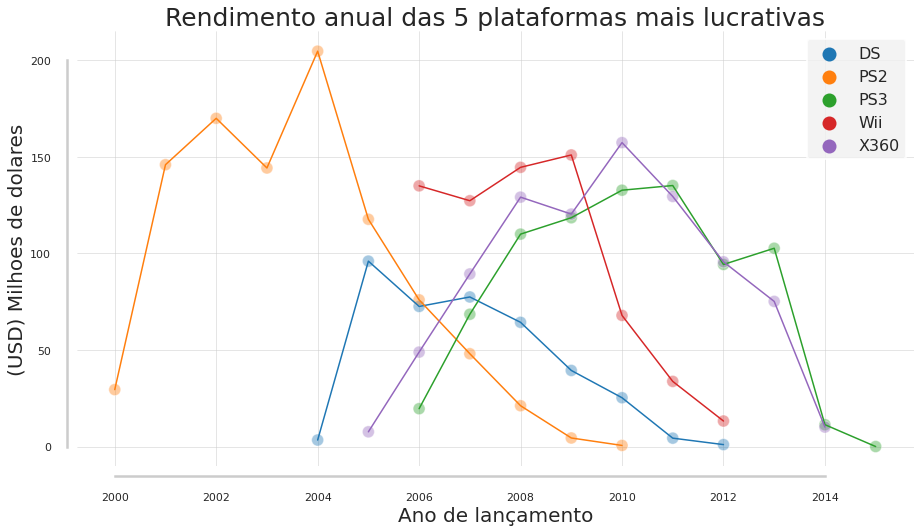

In [51]:
plt.figure(figsize=(15,8))

settings = {"grid.linewidth": 0.5, 'axes.labelsize': 20, 'legend.fontsize': 16, 'axes.titlesize': 25.0, "lines.linewidth": 1.5}

#verificar todas as chaves sns.plotting_context()

sns.set_style("whitegrid", {"axes.facecolor": "1"} )
sns.set_context("poster", font_scale = .5, rc=settings)
sns.lineplot(data=df_temp, x="year_of_release", y='total_vendas', hue='platform', legend=False).set(title='Rendimento anual das 5 plataformas mais lucrativas')
sns.scatterplot(data=df_temp, x="year_of_release", y="total_vendas", hue='platform', alpha=0.4)

legend = plt.legend()
seabornleg = legend.get_frame ()
seabornleg.set_facecolor ('#f1f1f1')
seabornleg.set_edgecolor ('white')

sns.despine(left=False, bottom=False, offset=10, trim=True)

plt.ylabel('(USD) Milhoes de dolares')
plt.xlabel('Ano de lançamento')

plt.show()



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente
</div>

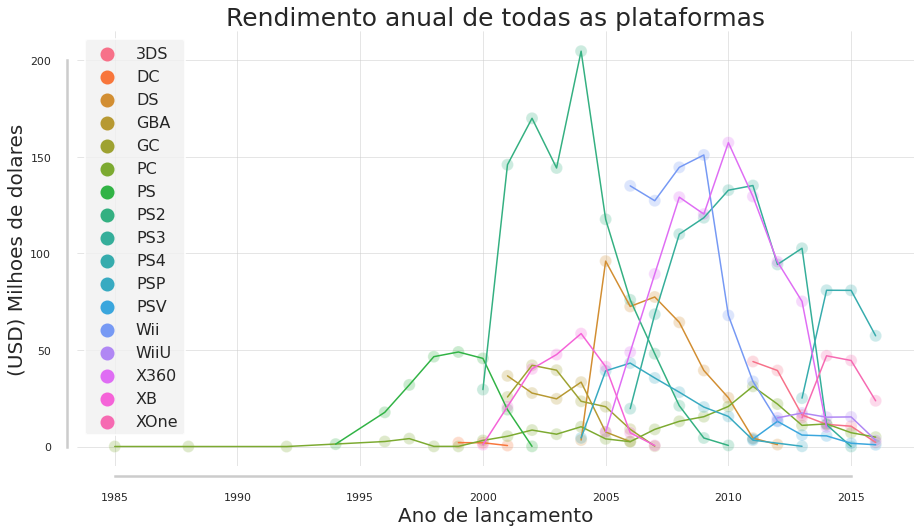

In [52]:
df_temp = df.pivot_table(index=['platform','year_of_release'], values='total_vendas', aggfunc='sum', fill_value=0).reset_index()
df_temp

plt.figure(figsize=(15,8))

settings = {"grid.linewidth": 0.5, 'axes.labelsize': 20, 'legend.fontsize': 16, 'axes.titlesize': 25.0, "lines.linewidth": 1.5}

#verificar todas as chaves sns.plotting_context()

sns.set_style("whitegrid", {"axes.facecolor": "1"} )
sns.set_context("poster", font_scale = .5, rc=settings)
sns.lineplot(data=df_temp, x="year_of_release", y='total_vendas', hue='platform', legend=False).set(title='Rendimento anual de todas as plataformas')
sns.scatterplot(data=df_temp, x="year_of_release", y="total_vendas", hue='platform', alpha=0.25)

legend = plt.legend()
seabornleg = legend.get_frame ()
seabornleg.set_facecolor ('#f1f1f1')
seabornleg.set_edgecolor ('white')

sns.despine(left=False, bottom=False, offset=10, trim=True)

plt.ylabel('(USD) Milhoes de dolares')
plt.xlabel('Ano de lançamento')

plt.show()



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito
</div>

Pelas visualizações acima podemos notar que por norma as plataformas têm um tempo de vida de aproximadamente de 7 a 10 anos

Iremos confirmar pelo quadro abaixo que apresenta a media da diferença entre o ano minimo e maximo para cada plataforma.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [53]:
df_lifetime = df.groupby('platform').agg(['min','max']).year_of_release

df_lifetime['lifetime'] = df_lifetime['max'] - df_lifetime['min']

display ( df_lifetime )

print("\nMedia: ")
print(df_lifetime.lifetime.mean())

,min,max,lifetime
platform,,,
3DS,2011,2016,5
DC,1999,2001,2
DS,2004,2012,8
GBA,2001,2006,5
GC,2001,2007,6
PC,1985,2016,31
PS,1994,2002,8
PS2,2000,2010,10
PS3,2006,2015,9



Media: 
7.647058823529412


Caso queiramos saber qual a plataforma mais velha, ja temos a responta, é o `PC`


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### - Período para filtro dos dados

Veremos quais plataformas estao ainda a ser vendidas no ano actual:

Primeiro uma amostra para confirmarmos o ano.

Usaremos o max - 1 pois se o ano actual é o max() e se estamos no inicio do ano a amostra real sera oculta.

In [54]:
df.loc [ df.year_of_release >= df.year_of_release.max() - 1 ][['platform','year_of_release']].sample(5)

,platform,year_of_release
4668,XOne,2016
12399,XOne,2016
325,PS4,2016
623,PS4,2015
12728,PS4,2015



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

A lista de plataformas:

In [55]:
listaPlataformasActuais = df.loc [ df.year_of_release >= df.year_of_release.max() - 1 ]['platform'].unique().tolist()
listaPlataformasActuais

['PS4', 'XOne', 'WiiU', '3DS', 'PC', 'PSV', 'PS3']


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [56]:
df.loc [ df.platform.isin( listaPlataformasActuais ) ].pivot_table(index='year_of_release', columns='platform', values='name',
                                                                  aggfunc='count', fill_value=' ')

platform,3DS,PC,PS3,PS4,PSV,WiiU,XOne
year_of_release,,,,,,,
1985,,1.0,,,,,
1988,,1.0,,,,,
1992,,1.0,,,,,
1996,,2.0,,,,,
1997,,1.0,,,,,
1998,,3.0,,,,,
1999,,2.0,,,,,
2000,,4.0,,,,,
2001,,11.0,,,,,



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Veremos entao a distribuicao de dos anos para estas plataformas.

### - Dados relevantes

Vamos determinar um periodo para o resto da analise dado o ciclo de vida das plataformas.

Com o quadro anterior fica evidente quais anos podemos trabalhar.

Decidimos trabalhar com dados a partir de 2011 de modos a manter a amostra mais robusta.

In [57]:
df = df.loc [ df.year_of_release >= 2011 ]


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### - Rendimento por plataformas.

Uma vez que temos apenas os dados com informação mais relevante, iremos verificar o lucro pelas plataformas mais recentes.

In [58]:
def obter_cores(coluna : pd.Series = None, corNormal:str='gray', corDestaque:str='#1071b2' ):
    
    cores = [corNormal if (x < np.max(coluna)) else corDestaque for x in coluna] 
    return cores

In [59]:
def barplot(df_tmp, xcol, ycol, xlabel, ylabel, title):
    
    cores = obter_cores ( df_temp[ycol], 'gray', cor )

    df_tmp.plot.barh(x=xcol, y=ycol, rot=0, color=cores, legend=False, figsize=(18,9))
    plt.ylabel('')
    plt.xticks(fontsize=16, rotation=0)
    plt.yticks(fontsize=16, rotation=0)
    plt.grid(axis = 'y')

    plt.xlabel(xlabel, color=cor, fontweight='bold')

    plt.text(df_temp[ycol].min(),  df_temp.index.max() + 1 , ylabel, fontsize=24, color=cor, fontweight='bold')

    plt.text( df_temp[ycol].max() * 1.02, (df_temp[ycol].idxmax()) - .15 , \
                    round ( df_temp[ycol].max(),2), color = 'white', fontsize='20', \
                    ha = 'left', Bbox = dict(facecolor = '#2ab0ff', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3') )

    sns.despine(left=True)

Total de vendas por plataforma:

In [60]:
df_temp = df.groupby('platform').total_vendas.sum().reset_index()
df_temp

,platform,total_vendas
0,3DS,123.99
1,DS,5.38
2,PC,87.99
3,PS3,343.54
4,PS4,244.27
5,PSP,3.49
6,PSV,31.09
7,Wii,46.98
8,WiiU,66.08
9,X360,310.48



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Visualização

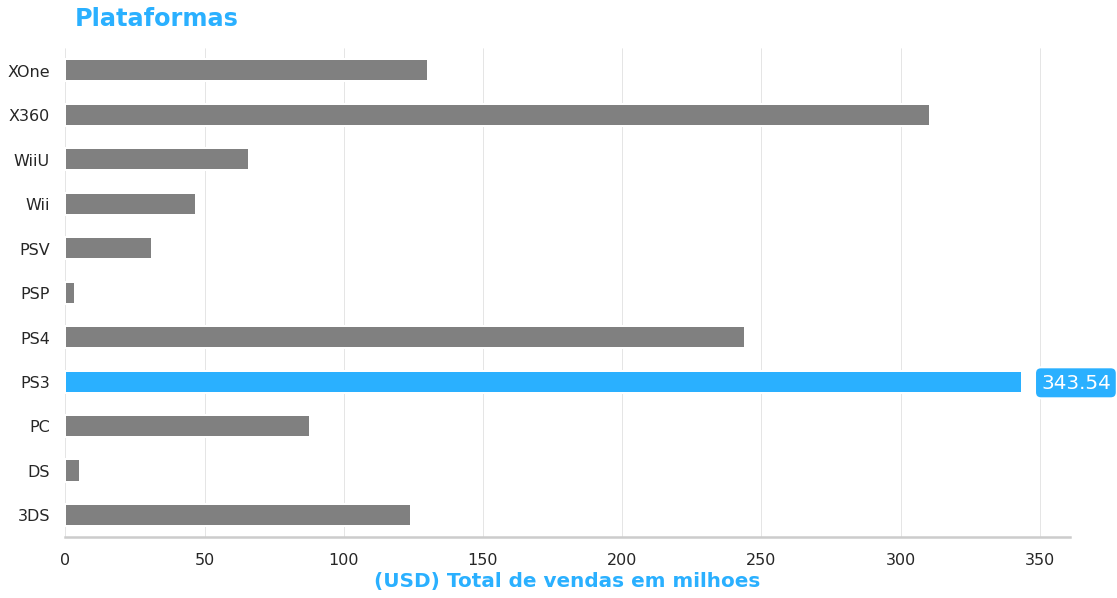

In [61]:
#df.groupby('platform').total_vendas.sum().plot(kind='barh')
barplot(df_temp, 'platform','total_vendas', '(USD) Total de vendas em milhoes','Plataformas','c')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Mais uma vez excelente!
</div>

O grafico deixa claro qual a plataforma que ate o ano de 2016 tem gerado maior rendimento, o PS3

Provavelmente se filtrassemos os dados pelo intervalo de 2013 ate o ano actual a resposta seria diferente, pois até 2013 não tinhamos ainda o lançamento do PS4 e XOne.

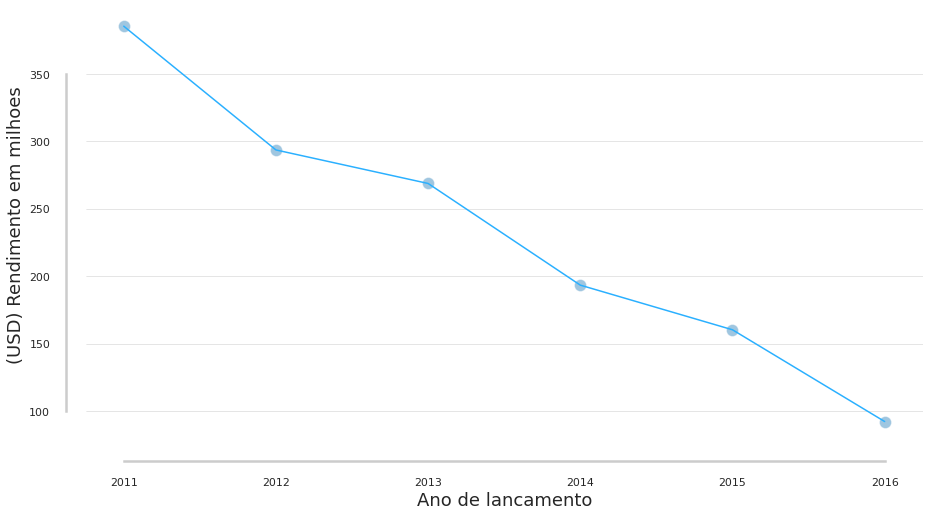

In [62]:
df_temp = df.groupby('year_of_release').total_vendas.sum().reset_index()

titulo = f"Desempenho das vendas entre {df_temp.year_of_release.min()} e {df_temp.year_of_release.max()}"

lineplotwithDots(df_temp, (15,8), 'year_of_release','total_vendas',titulo, 'Ano de lancamento','(USD) Rendimento em milhoes')

A visualização acima mostra de `forma geral` para os ultimos anos a falta de crescimento em termos de lucro.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### - Diferença nas vendas por plataforma.


Para termos uma ideia individual das vendas por plataforma iremos ver a distribuição das vendas por graficos de caixa.

In [63]:
#df.platform.platfomr().tolist()
df_temp = df.pivot_table(index=['year_of_release'], values='total_vendas', aggfunc='sum', columns='platform' , fill_value=0).reset_index()

df_temp

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2011,44.03,4.36,31.19,135.18,0.00,3.34,3.88,33.75,0.00,129.53,0.00
1,2012,39.39,1.02,22.01,94.30,0.00,0.00,13.07,13.23,14.85,95.68,0.00
2,2013,16.36,0.00,10.98,102.70,25.07,0.15,5.96,0.00,17.40,75.17,14.92
3,2014,11.49,0.00,11.74,11.34,80.95,0.00,5.53,0.00,15.22,10.10,47.01
4,2015,10.55,0.00,7.18,0.02,80.90,0.00,1.72,0.00,15.35,0.00,44.58
5,2016,2.17,0.00,4.89,0.00,57.35,0.00,0.93,0.00,3.26,0.00,23.70



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Visualizacao

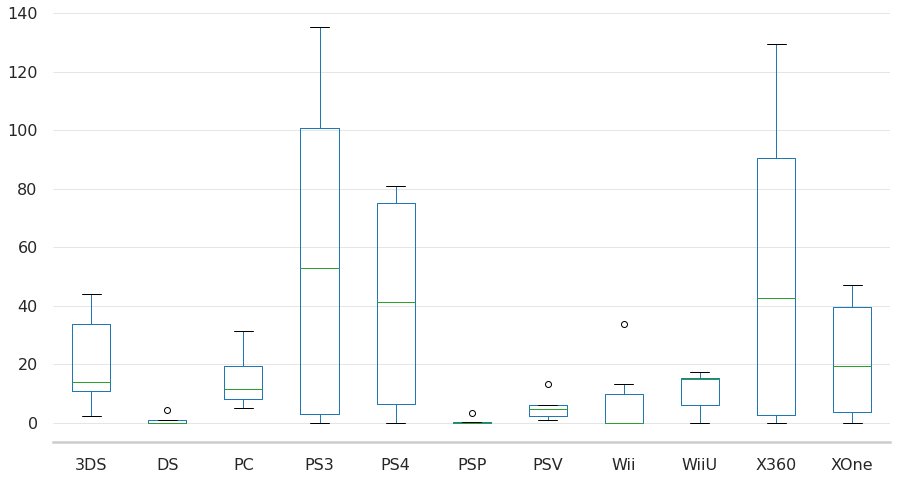

In [64]:
df_temp.boxplot(column=df_temp.columns[1:].tolist(), figsize=(15,8))

display( HTML( f'<h2 style="color:{cor}">Distribuicao das vendas entre {df_temp.year_of_release.min()} e \
              {df_temp.year_of_release.max()} pelas plataformas recentes</h2><br>') )

plt.ylabel('')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.grid(axis = 'x')
sns.despine(left=True)
plt.show()


Como pode ser notado, há muita diferença nas vendas por cada plataforma.

Temos poucas plataformas com valores atipicos nas suas vendas.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### - Relação entre as avalicaões e vendas de uma plataforma popular.

A nossa plataforma a ser validada será a `XBox One` porque, a PS3 e X360 apesar de liderarem as vendas são da geração de consolas passadas e a PS4 tem notavelmente um rendimento maior o faz com que seja uma vitima de estudo mais obvia, então ficamos pelo "2º" mais rentavel para ver se podemos notar algum padrão claro para estes jogos. 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Escolha interessante.
</div>

In [65]:
df_xone = df [ df.platform == 'XOne' ]

df_xone.shape[0]

165

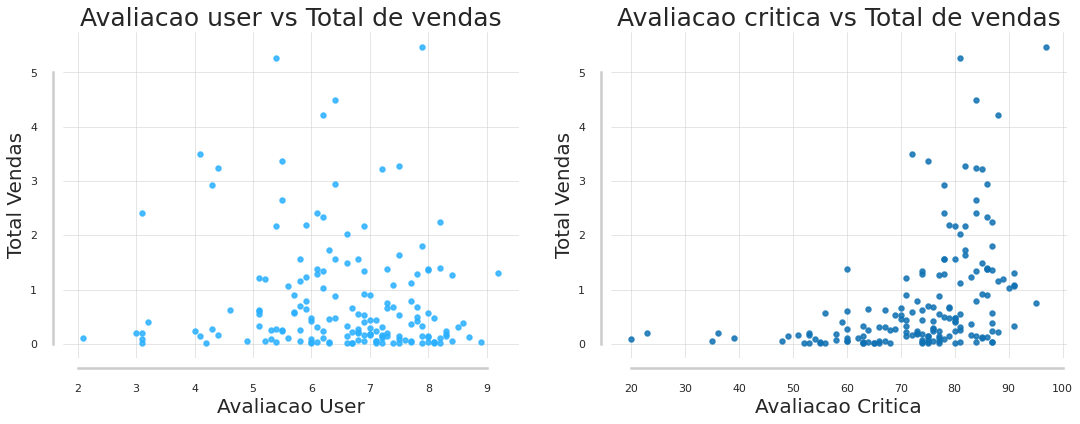

In [66]:
fig = plt.figure()
fig.set_size_inches(18,6)

axs = fig.subplots(1,2) 

ax1 = axs[0]
ax2 = axs[1]

df_xone.plot.scatter( x='user_score', y ='total_vendas', alpha=0.8, ax=ax1, color=cor , \
                ylabel='Total Vendas', xlabel='Avaliacao User', title='Avaliacao user vs Total de vendas')
df_xone.plot.scatter( x='critic_score', y ='total_vendas', alpha=0.8, ax=ax2, color=cor2, \
                ylabel='Total Vendas', xlabel='Avaliacao Critica',title='Avaliacao critica vs Total de vendas' )

sns.despine(left=False, bottom=False, offset=10, trim=True)

plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Podemos notar uma correlação positiva entre o rendimento e a avaliação critica.

In [67]:
df_xone[['user_score','critic_score','total_vendas']].corr()

,user_score,critic_score,total_vendas
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
total_vendas,-0.094003,0.410422,1.000000


O nivel de correlação verificado é de 41%


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Importante avaliar a correlação de Pearson para confirmar a intuição obtida com o scatter plot
</div>

#### - Comparação dos jogos com outras plataformas.

In [68]:
jogosXOne = df_xone.name.unique().tolist()

jogos = df.loc [ df.name.isin(jogosXOne) ]

jogos.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
2734,Pro Evolution Soccer 2015,PS4,2014,Sports,0.09,0.45,0.11,0.10,82.0,7.2,E,0.75
3363,LEGO The Hobbit,PS4,2014,Action,0.13,0.38,0.00,0.09,72.0,6.6,E10+,0.60
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
12368,Mirror's Edge Catalyst,PC,2016,Platform,0.01,0.05,0.00,0.00,74.0,4.4,T,0.06
3748,LEGO Dimensions,WiiU,2015,Action,0.30,0.18,0.00,0.05,62.0,6.5,E10+,0.53



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [69]:
df_temp = jogos [ jogos.duplicated('name', keep=False) ][['name','platform','total_vendas']].sort_values('name')

display ( df_temp.groupby(['name','platform']).sum() )

df_temp = df_temp.groupby(['platform']).sum().reset_index()
display ( df_temp )

total_vendas
name                              platform              
7 Days to Die                     PS4               0.14
                                  XOne              0.05
Agatha Christie's The ABC Murders PS4               0.02
                                  XOne              0.01
Alien: Isolation                  PC                0.15
...                                                  ...
XCOM 2                            PC                0.23
                                  PS4               0.14
                                  XOne              0.04
Zombie Army Trilogy               PS4               0.20
                                  XOne              0.11

[408 rows x 1 columns]

,platform,total_vendas
0,3DS,0.27
1,PC,16.66
2,PS3,52.64
3,PS4,196.87
4,PSV,0.46
5,WiiU,5.81
6,X360,48.89
7,XOne,104.60



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

##### Visualizacao

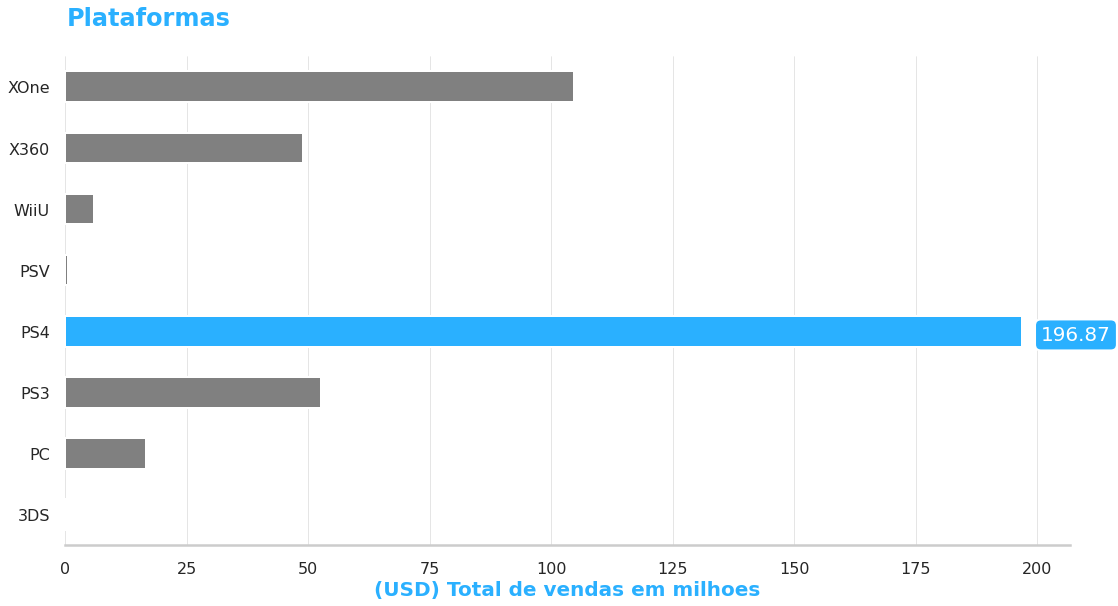

In [70]:
#sns.barplot(data=df_temp, x='platform', y="total_vendas")
#plt.show()
barplot(df_temp, 'platform','total_vendas', '(USD) Total de vendas em milhoes','Plataformas','c')

Dos titulos para o XOne também lançados para as outras plataformas, nota-se um rendimento maior na venda para a PS4.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### - Genero dos jogos

Na sequencia veremos o rendimento dos jogos pelo genero.

In [71]:
df_temp = df.groupby('genre').total_vendas.sum().reset_index().sort_values('total_vendas', ascending=False)
df_temp

,genre,total_vendas
0,Action,426.94
8,Shooter,338.64
10,Sports,167.65
7,Role-Playing,133.06
4,Platform,74.97
6,Racing,69.07
3,Misc,65.81
2,Fighting,45.59
9,Simulation,30.29
1,Adventure,21.37



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

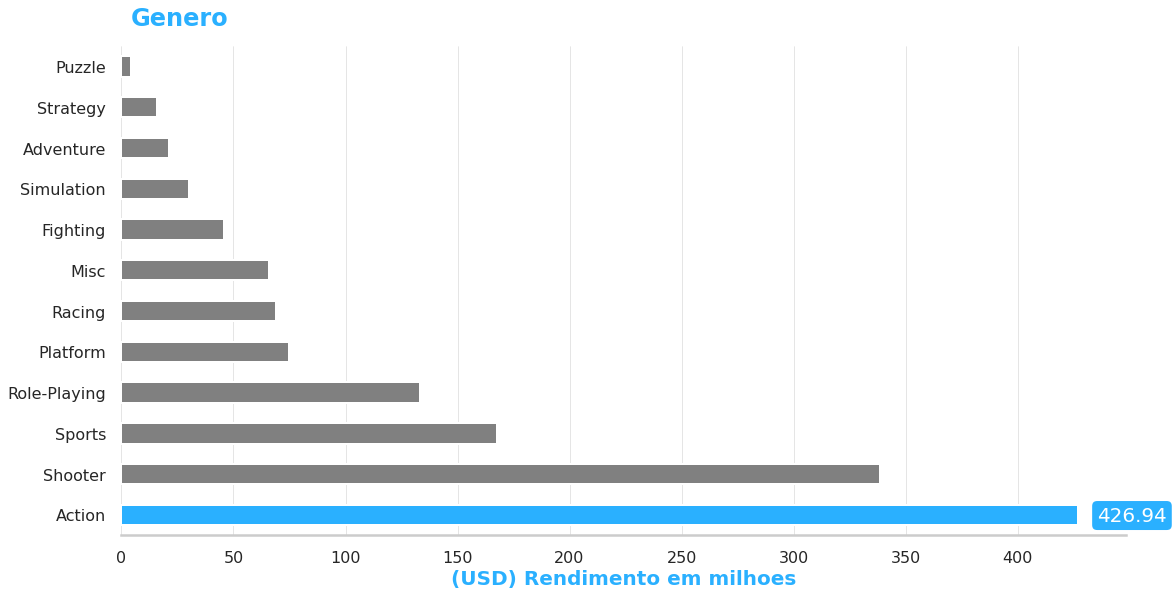

In [72]:
barplot(df_temp, 'genre','total_vendas', '(USD) Rendimento em milhoes','Genero','c')

O grafico acima nos ajuda a responder quais os generos têm gerado melhor receita desde 2011.  
Temos o genero de `ação` como o mais lucrativo, pois tendem a ser projectos AAA das grandes desenvolvedoras.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Criar perfis de usuário para cada região

Criamos a funcao abaixo para evitar a redundancia na codificacao uma vez que o estudo será o mesmo por região.

In [73]:
# Desligar o scroll e apresentar o output completo 

In [74]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [75]:
def imprimir_estudos_regiao( df : pd.DataFrame = df , regiao : str = None, coluna_regiao:str = None ):
    
    display( HTML( f'<h2 style="color:{cor}">_______________ {regiao} ____________________________________ </h2>') )
    
    fig = plt.figure()
    fig.set_size_inches(18,5)
    
    axs = fig.subplots(1,2) 
    
    ax1 = axs[0]
    ax2 = axs[1]
    
    #fig2 = plt.figure()
    #ax3 = fig2.subplots(1,1)
    
    # Top 5 plataformas
    df_regiao = df[[coluna_regiao,'platform','genre']]
    df_temp = df_regiao.groupby('platform')[coluna_regiao].sum().reset_index().sort_values(coluna_regiao, ascending=False)
    
    
    ax1.set_xlabel('(USD) Rendimento em Milhoes', fontsize=20)
    ax2.set_xlabel('(USD) Rendimento em Milhoes', fontsize=20)
    
    display( HTML( f'<h3>Top 5 Plataformas & Top 5 Generos </h3>') )
    display( HTML( f'<br>') )
    
    #display(df_temp[:5])
    
    #Grafico Top 5 plataformas
    
    cores = [cor2 if (x < np.max(df_temp[:5][coluna_regiao])) else cor for x in df_temp[:5][coluna_regiao] ] # Obter uma lista de cores e destacar a coluna max
    
    df_temp[:5].plot.barh(x='platform', y=coluna_regiao, rot=0, ax=ax1, legend=False, color=cores)
    ax1.text(0,  df_temp[:5].reset_index().index.max() + 0.6 , 'Plataforma', fontsize=20)
    ax1.set_ylabel(' ', fontsize=20)
    
    #ax1.bar_label(ax1.containers[0])
    
    #Top 5 generos
    df_temp = df_regiao.groupby('genre')[coluna_regiao].sum().reset_index().sort_values(coluna_regiao, ascending=False)
    #display( df_temp[:5])

    cores = [cor2 if (x < np.max(df_temp[:5][coluna_regiao])) else cor for x in df_temp[:5][coluna_regiao] ] # Obter uma lista de cores e destacar a coluna max
    
    ax2.text(0,  df_temp[:5].reset_index().index.max() + 0.6 , 'Genero', fontsize=20)
    df_temp[:5].plot.barh(x='genre', y=coluna_regiao, rot=0, ax=ax2, color=cores)
    ax2.set_ylabel(' ', fontsize=20)
    
    sns.despine(left=True, bottom=False, offset=10, trim=True)
    plt.show()

    
    display( HTML( f'<h3>Total da regiao {regiao} vs Total geral por Classificacao </h3>') )
    display( HTML( f'<br>') )
    
    total_vs_regiao = df.pivot_table(index='rating', values=(coluna_regiao, 'total_vendas'), aggfunc='sum')
    total_vs_regiao
    total_vs_regiao.plot(kind='barh', legend=True, figsize=(20,7), color=[cor,cor2])
    plt.xlabel('(USD) Rendimento em Milhoes', fontsize=20)
    plt.xticks(fontsize=16, rotation=0)
    plt.yticks(fontsize=16, rotation=0)
    plt.ylabel('')
    sns.despine(left=True, bottom=False, offset=10, trim=True)
    
    plt.text(0,  total_vs_regiao.reset_index().index.max() + 0.6 , 'Classificacao ESRB', fontsize=20)
    #sns.despine()
    plt.show()
    
    display( HTML( f'<h3>Correlacao entre o total de classificacoes e o lucro na regiao</h3>') )
    # Obter o total de vendas por cada classificacao 
    df_temp_rating = df.pivot_table(index='rating', values=coluna_regiao, aggfunc=['sum','count'])

    df_temp_rating.columns = ['total_Avaliacoes','total_Lucro']
    display( df_temp_rating )
    display ( df_temp_rating.corr() )
    
    display( HTML( f'<hr>') )


### Para cada região (AN, UE, JP), iremos determinar o seguinte:

- As cinco plataformas principais.
- Os cinco principais gêneros.
- Verificar se as classificações do ESRB afetam as vendas na regiao.

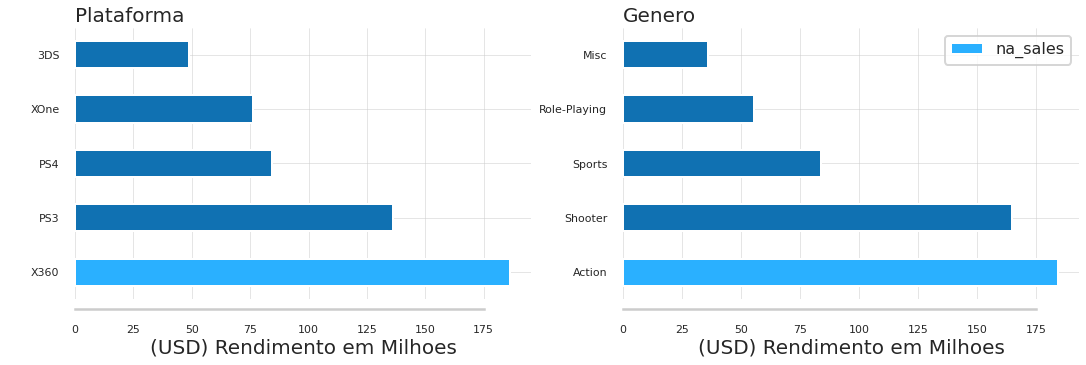

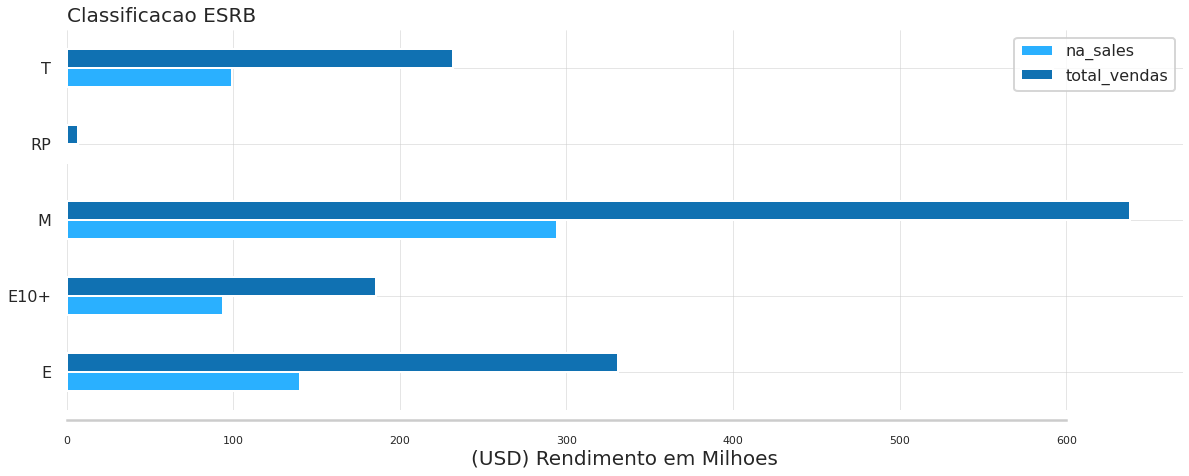

,total_Avaliacoes,total_Lucro
rating,,
E,139.97,358
E10+,93.70,297
M,294.44,567
RP,1.20,55
T,99.48,489


,total_Avaliacoes,total_Lucro
total_Avaliacoes,1.000000,0.844476
total_Lucro,0.844476,1.000000


In [76]:
imprimir_estudos_regiao(df, 'America','na_sales')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns. Ficou muito bom!
</div>

**Para a America do Norte observa-se o seguinte:**

- A plataforma mais rentavel tem sido a `X360`
- O genero mais consumido é `Acção`
- A correlação entre o lucro no rendimento para esta região e a quantidade de avaliações é `positiva`


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

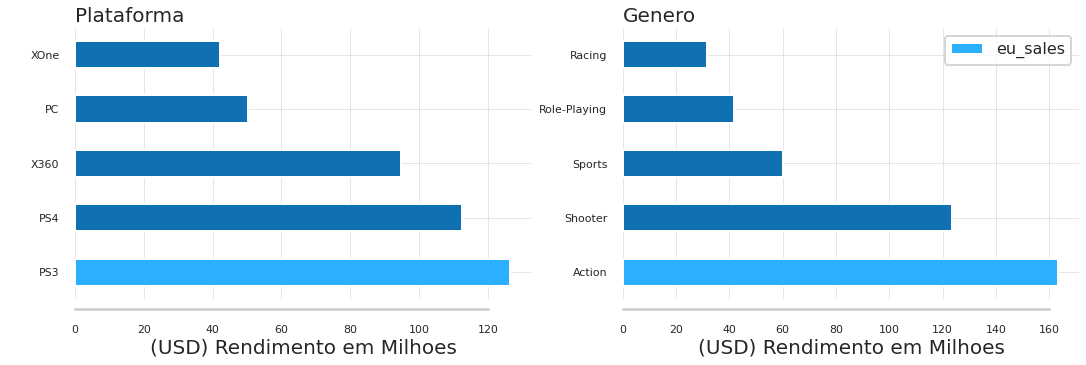

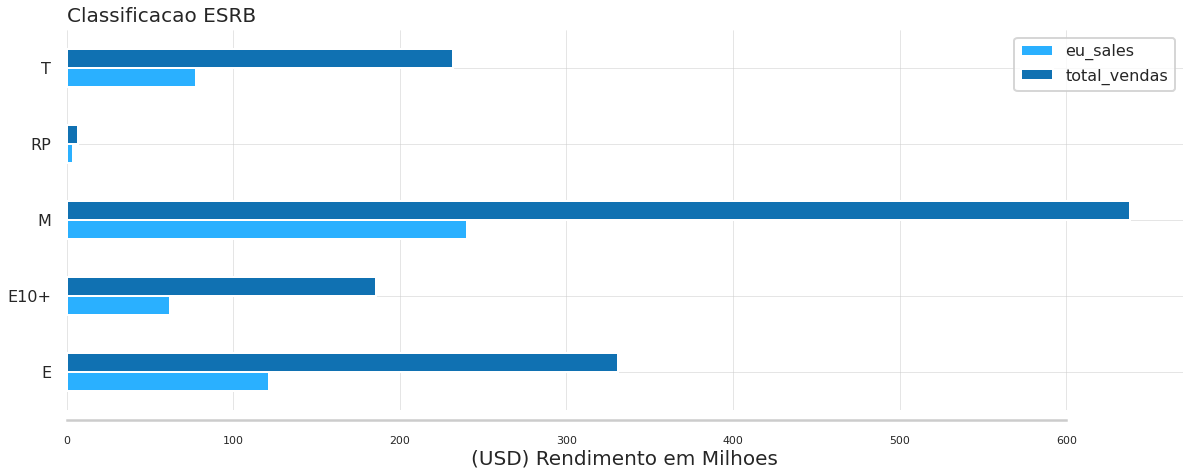

,total_Avaliacoes,total_Lucro
rating,,
E,121.41,358
E10+,61.79,297
M,240.11,567
RP,3.91,55
T,77.46,489


,total_Avaliacoes,total_Lucro
total_Avaliacoes,1.000000,0.826653
total_Lucro,0.826653,1.000000


In [77]:
imprimir_estudos_regiao(df, 'Europa','eu_sales')

**Para a Europa do observa-se o seguinte:**

- A plataforma mais rentavel tem sido o `PS3`
- O genero mais consumido assim como na America do Norte é `Acção`
- A correlação entre o lucro no rendimento para esta região e a quantidade de avaliações também é `positiva`


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

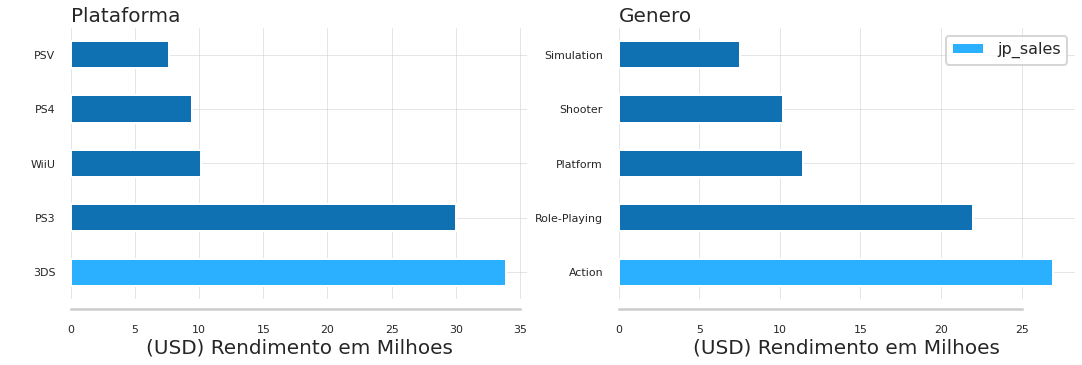

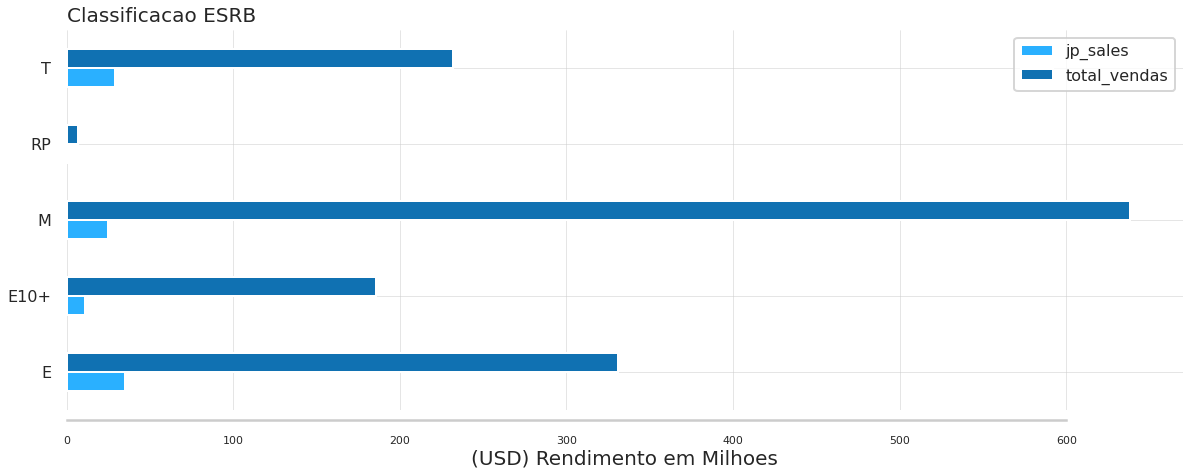

,total_Avaliacoes,total_Lucro
rating,,
E,34.96,358
E10+,10.93,297
M,24.95,567
RP,0.89,55
T,29.01,489


,total_Avaliacoes,total_Lucro
total_Avaliacoes,1.000000,0.777129
total_Lucro,0.777129,1.000000


In [78]:
imprimir_estudos_regiao(df, 'Japão','jp_sales')

**Para o Japão do observa-se o seguinte:**

- A plataforma mais rentavel tem sido o Nintendo `3DS`
- O genero mais consumido assim como na America do Norte e Eurpa é `Acção`, vale destacar que não fica muito a frente do 2º lugar que é o genero Role-Playing.
- A correlação entre o lucro no rendimento para esta região e a quantidade de avaliações também é `positiva`


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Teste de Hipóteses:

Para este estudo iremos validar as seguintes hipoteses:

- As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

- As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Iremos considerar o limiar `alfa` em 0.05



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Hipotese 1 - Classificacoes medias dos users de XOne e PC são as mesmas.

**hipótese nula H₀:** 
- "As classificacoes medias dos utilizadores de Xbox On e PC são as mesmas"


**hipótese alternativa H₁, é baseada em H₀. Para este H₀, H₁ sera:**
- “As classificacoes medias dos utilizadores de Xbox On e PC são diferentes.”


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Para testar sua hipótese de que as médias de **dois conjuntos** são iguais com base nas amostras retiradas iremos aplicar o método:

`scipy.stats.ttest_ind`

Conjunto 1 : classificacoes medias para os utilizadores de Xbox One  
Conjunto 2 : classificacoes medias para os utilizadores de PC

In [79]:
df_xbox = df.loc [ df.platform == 'XOne' ]
df_pc = df.loc [ df.platform == 'PC' ]

mediaXO = df_xbox.user_score.mean()
mediaPC = df_pc.user_score.mean()

varXO = np.var( df_xbox.user_score )
varPC = np.var( df_pc.user_score )

stdXO = np.std( df_xbox.user_score )
stdPC = np.std( df_pc.user_score )

print('Utilizadores XOne, Media:', mediaXO )
print('Utilizadores PC, Media:', mediaPC )
print('--')
print('Utilizadores XOne, Variancia:', varXO )
print('Utilizadores PC, Variancia:', varPC )
print('--')
print('Utilizadores XOne, Desvio Padrão:', stdXO )
print('Utilizadores PC, Desvio Padrão:', stdPC )


Utilizadores XOne, Media: 6.538181818181818
Utilizadores PC, Media: 6.471527777777777
--
Utilizadores XOne, Variancia: 1.7855118457300279
Utilizadores PC, Variancia: 2.5120365547839505
--
Utilizadores XOne, Desvio Padrão: 1.3362304613089868
Utilizadores PC, Desvio Padrão: 1.5849405524447755


As variancias não são aproximadamente iguais.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [80]:
alpha = 0.05

In [81]:
results = st.ttest_ind( df_xbox.user_score , df_pc.user_score, equal_var = False )

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("\nHipótese nula sera rejeitada! ")
else:
    print("\nNão podemos rejeitar a hipótese nula! ")

p-value:  0.6346150609475893

Não podemos rejeitar a hipótese nula! 



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Hipotese 2 - As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.


**hipótese nula H₀:** 
- "As classificacoes medias dos utilizadores para o genero ação e esportes são diferentes"


**hipótese alternativa H₁, é baseada em H₀. Para este H₀, H₁ sera:**
- “As classificacoes medias dos utilizadores para o genero ação e esportes são iguais.”


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [82]:
df_amostra1 = df.loc [ df.genre == 'Action' ]
df_amostra2 = df.loc [ df.genre == 'Sports' ]

mediaAmostra1 = df_amostra1.user_score.mean()
mediaAmostra2 = df_amostra2.user_score.mean()

varAmostra1 = np.var( df_amostra1.user_score )
varAmostra2 = np.var( df_amostra2.user_score )

stdAmostra1 = np.std( df_amostra1.user_score )
stdAmostra2 = np.std( df_amostra2.user_score )

print('Utilizadores Action, Media:', mediaAmostra1 )
print('Utilizadores Sports, Media:', mediaAmostra2 )
print('--')
print('Utilizadores Action, Variancia:', varAmostra1 )
print('Utilizadores Sports, Variancia:', varAmostra2 )
print('--')
print('Utilizadores Action, Desvio Padrão:', stdAmostra1 )
print('Utilizadores Sports, Desvio Padrão:', stdAmostra2 )

Utilizadores Action, Media: 6.833510638297871
Utilizadores Sports, Media: 5.956593406593406
--
Utilizadores Action, Variancia: 1.671057888184699
Utilizadores Sports, Variancia: 1.9549839995169667
--
Utilizadores Action, Desvio Padrão: 1.2926940427590354
Utilizadores Sports, Desvio Padrão: 1.3982074236381978



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Iremos olhar a distribuicao de valores para as duas amostras.

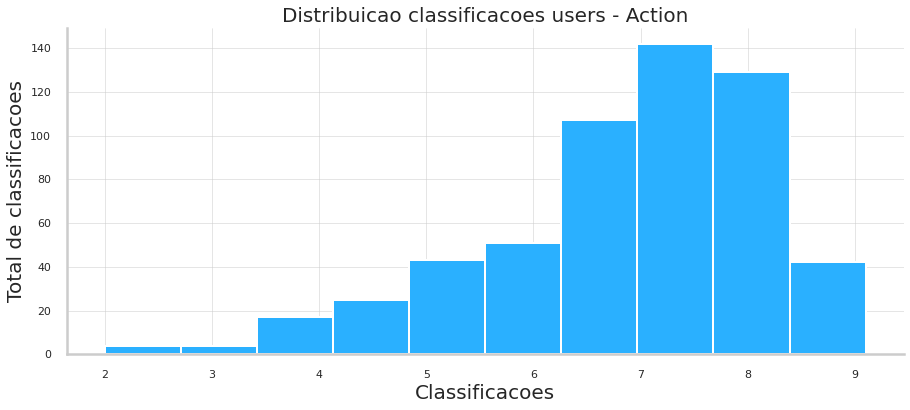

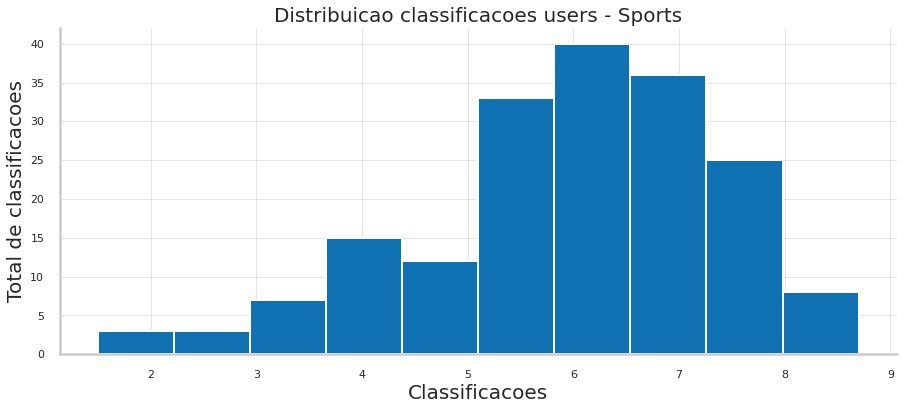

In [83]:
df_amostra1.user_score.hist(color=cor, figsize=(15,6))
plt.title('Distribuicao classificacoes users - Action', fontsize=20)
sns.despine()
plt.xlabel('Classificacoes')
plt.ylabel('Total de classificacoes')
plt.show()

df_amostra2.user_score.hist(color=cor2, figsize=(15,6))
plt.title('Distribuicao classificacoes users - Sports', fontsize=20)
plt.xlabel('Classificacoes')
plt.ylabel('Total de classificacoes')
sns.despine()

plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Tendo as varianças diferentes utilizaremos o parametro equal_var como `False`.

In [84]:
results = st.ttest_ind(df_amostra1.user_score, df_amostra2.user_score, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("\nHipótese nula sera rejeitada! ")
else:
    print("\nNão podemos rejeitar a hipótese nula! ")

p-value: 9.49693631268147e-13

Hipótese nula sera rejeitada! 



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Conclusão

Feita a analise do conjunto de dados da loja de video jogos **ICE** com o objectivo de **planejar as publicidades para o ano de 2017** deixamos então as nossas observações para ajudar na tomada de decisão sem esquecer que é necessário considerar sempre que o mercado de video jogos é bastante dinamico e cabe as empresas/lojas terem um plano com alguma flexibilidade para acompanhar o mercado.

- O lançamento de jogos anuais teve um **<font color='green'>crescimento</font>** bastante notavel desde o ano de 2000, e não mostra ainda sinais maduros e desaceleração, o que pode certamente implicar que os comerciantes tenham mais **capital para poder investir** nos jogos recentes que serão lançados para o proximo ano.


- O tempo medio de vida das plataformas varia de **7 a 10 anos**, com esta aprendizagem fica claro que devemos nos atentar aos lançamento de **novas consolas** principalmente dos que dominam o mercado (O PlayStation e a XBox), por exemplo, o PS4 foi lançado em 2013 e entraremos em 2017, sendo assim, podemos **<font color='green'>esperar que nos proximos 3 anos (2020 max) venha a ser lançado o PS5. </font>**   
É necessário que a **ICE** esteja preparada para atender a **demanda** dos utilizadores.


- As plataformas que **<font color='green'>mais há consumidores</font>** de jogos até o momento são o **PS3 e X360**, no entanto por serem plataformas da geração passada as **<font color='blue'>novas plataformas (PS4 e XOne) têm ganhado muita aderência</font>** por parte dos consumidores então há que acompanhar e saber fazer uma mudança nas aquisições e distribuiçoes dos futuros jogos.

- De forma geral, os generos que mais geram receita são:  
 **1º Ação - Para todas as regiões**  
 **2º Role Playing - Para o Japão e Shooter - Para a região Norte Americana e Europeia.**


- Os jogos com a <font color='green'>classificação M (Mature) tem tido maior aderência</font> por parte dos utilizadores das regiões Norte Americana e Europeia.


- Para os titulos lançados para as varias plataformas, o PS4 tem tido o registo de campeão para os consumidores.







> Obrigado,
<font color='blue'>Gerson Barroso.</font>

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 

Seu projeto está excelente. Você demonstra uma grande habilidade com geração de gráficos e apresentação de resultados. Parabéns. 
Se você se interessar por data storytelling, gostaria de sugerir a leitura deste excelente livro:
    "Storytelling with Data: A Data Visualization Guide for Business Professionals"

Desejo sucesso na jornada.
</div>